# Exploring each Group to Look at ways to Analyze
## DRAFT WORK ##

## now only erroring on original 3 .txt noted by Ian Gorton in original commnication



# TO DO

# broken down by conferences and years...  (enter a keyword and see trend over conference and year.
- Search by Conf and Year DONE
- - see visual breakdown DONE
- - link to the link to the papers/title/abstract DONE
- - link to the top 10 keywords and papers (see a pie chart) DONE

## top keywords(cts?) for given conference over the years.
- - NEED TO DO : choose top 10 and see over time for a conference?

## compare the confernces - given two conferences display their top keywords for a given year
- - can do it but not at the same time



# Keywords
-  search for a keyword
- - see its trends (heatmap of conf/year/count)
- - see counts per conf/year
- - see what papers it is part of
- from conf/year link to the papers/title/abstract

# Authors
- search for an author by paper ID
- search for an author by name
- - see authors and their paper cts per conference/year breakdown


## top 20 authors and their keywords, conferences, trends over time.
 

In [1]:
import sqlite3
import pandas as pd
mydb = 'Abstracts_DB2.db'

In [2]:
import sqlcommands as cmd
cmd = reload(cmd)

(1061, 7)
(1061, 7)


# Functions to test visualizations (in ../Flask/app/images.py)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cStringIO import StringIO
import base64
import seaborn as sns
%matplotlib inline

def getPieOne(df, conference):
    fig = plt.figure()
    fig = df.plot(kind = 'pie', 
                  colormap = 'Blues', 
                  title = conference, 
                  subplots = True, 
                  legend = False, 
                  labels = ['' for x in np.arange(len(df))])
    plt.ylabel('')
    plt.legend( list(df.index), 
               bbox_to_anchor=(1.1, 1),
              fontsize = "xx-small")
    
    io = StringIO()
    plt.savefig(io, format='png')
    img = base64.encodestring(io.getvalue())
   
    io = StringIO()
    plt.savefig(io, format='png')
    data = base64.encodestring(io.getvalue())
    script = '''<img src="data:image/png;base64,{}";/>'''
    
    return fig
    #plt.close()
    #return script.format(data)


def getBar(df, conference, xaxis, yaxis, orientation, ylabel = 'count', xlabel = 'trada'):
    plt.cla()
    fig = sns.barplot(data = df, 
                      y =  yaxis,#'keyword', 
                      x = xaxis, #'count', 
                      palette='Blues', 
                      orient = orientation)
    fig.set_ylabel(ylabel)
    fig.set_xlabel(xlabel)
    
    #for l in fig.get_ymajorticklabels():
        #l.set_visible(False)
    io = StringIO()
    plt.savefig(io, format='png')
    img = base64.encodestring(io.getvalue())
   
    io = StringIO()
    plt.savefig(io, format='png')
    data = base64.encodestring(io.getvalue())
    script = '''<img src="data:image/png;base64,{}";/>'''
    return fig
    #plt.close()
    #return script.format(data)


def getHeatMap(data_frame, indexCol = 'confName', cols = 'pubYear', vals = 'counts', annott = True):
    #plt.cla()
    
    fig = sns.heatmap(data_frame.pivot_table(index=indexCol, 
                                             columns=cols, 
                                             values=vals), 
                                             annot = annott,
                                             cmap = 'Blues',
                     )
    
   
    io = StringIO()
    plt.savefig(io, format='png')
    img = base64.encodestring(io.getvalue())
   
    io = StringIO()
    plt.savefig(io, format='png')
    data = base64.encodestring(io.getvalue())
    script = '''<img src="data:image/png;base64,{}";/>'''
    return fig
    #plt.close()
    #return script.format(data)

def getSpot(d, KWgrouper, xaxis = 'pubYear', yaxis = 'coded', sizes = 'counts'):
    
    labels = {'WICSA':1, "ECSA":2, 'QoSA':3}
    df = d.groupby(KWgrouper)['keyword'].count().reset_index(name="counts")
    
    df['coded'] = df.confName.apply(lambda x: labels[x])
    
    fig = plt.scatter(x=df[xaxis], y =df[yaxis], s = df[sizes]*10)
    io = StringIO()
    plt.savefig(io, format='png')
    img = base64.encodestring(io.getvalue())
   
    io = StringIO()
    plt.savefig(io, format='png')
    data = base64.encodestring(io.getvalue())
    script = '''<img src="data:image/png;base64,{}";/>'''
    return fig 
    
def getLine(data_frame, xaxis = 'confName', yaxis = 'counts'):
    #plt.cla()
    fig = sns.swarmplot(data = data_frame, 
                        x=xaxis, 
                        y = yaxis,
                        palette = 'Blues')
    
    io = StringIO()
    plt.savefig(io, format='png')
    img = base64.encodestring(io.getvalue())
   
    io = StringIO()
    plt.savefig(io, format='png')
    data = base64.encodestring(io.getvalue())
    script = '''<img src="data:image/png;base64,{}";/>'''
    return fig
    #return script.format(data)

# Conference and Publications
- DONE
- - Search by Conference and Year
- - See visual breakdown by Conf and Year
- - Links to what were the top 10 keywords (and their papers)
- - Links to the Papers and their keywords for that Pub/Conf breakdown


In [4]:
def getContentsconf():
    with sqlite3.connect(mydb) as con:
        sqlcmd = "SELECT Conf, Year FROM ABSTRACTSTOTAL"
        df = pd.read_sql_query(sqlcmd, con)
        myt = []
    
        
        conferences = list(df['Conf'].unique())
    
   
        for conf in conferences:
        
            entry = {}
            entry['conf'] = conf
        
            subDF = df.query('Conf == "%s"' % conf).groupby('year').count()
            entry['counts'] = subDF.to_html()
            
            image = getPieOne(subDF, conf)
            entry['Pie']  = image
            
            subDF.reset_index(inplace = True)
            image2 = getBar(subDF, 
                            conf, 
                            xaxis = 'year', yaxis = 'Conf', 
                            orientation = "v"
                            )
            entry['Bar'] = image2
        
            myt.append(entry)
    
    return dict(data = myt), df, subDF

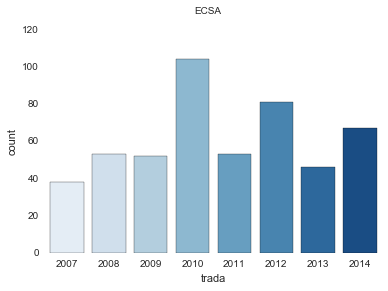

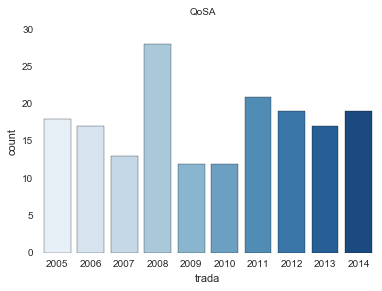

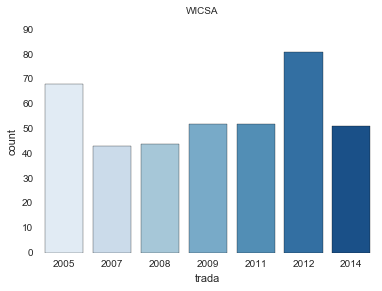

In [5]:
g, df, s = getContentsconf()

In [6]:

pd.get_dummies(df.Conf, prefix = 'Conf')

#set the last column (ECSA) as base.  thus 0,0 = ECSA, 0,1 = Wicsa, 1,0 = QoSA
confDummies = pd.get_dummies(df.Conf, prefix = 'Conf').iloc[:,1:]
df = pd.concat([df, confDummies], axis = 1)
df['confcode'] = df.Conf.map({'ECSA':1, 'QoSA' : 2, 'WICSA' :3})
df.iloc[100:300, :]
pd.get_dummies(df, columns = ['Conf', 'year'], drop_first = True)

,Conf_QoSA,Conf_WICSA,confcode,Conf_QoSA,Conf_WICSA,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014
0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Trying HeatMap

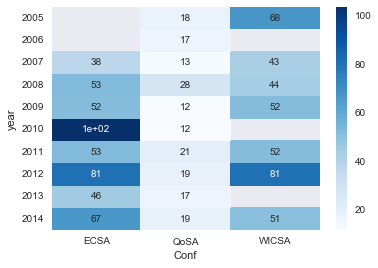

In [7]:
df = df.groupby(['Conf', 'year'])['Conf'].count().reset_index(name="counts")
y = sns.heatmap(df.pivot_table(index='year', columns='Conf', values='counts'),
                                             cmap = 'Blues', annot = True)


# Papers and Their Keywords
- search by Keyword - get paperIds, conf, years, link to HEATMAP of count over the years/conferences



In [8]:
def getPapersKWgroup(grouper):
    
    with sqlite3.connect('Abstracts_DB.db') as con:
        sqlcmd = "SELECT paperID, title, confName, pubYear FROM PAPER "
        
        paperdf = pd.read_sql_query(sqlcmd, con)
        
        sqlcmd2 = "SELECT paperID, keyword FROM PAPERKEY "
        kwdf = pd.read_sql_query(sqlcmd2, con)
        kwdf['keyword'] = kwdf['keyword'].apply(lambda word: eval(word))
        
        merged = kwdf.merge(paperdf, on = 'paperID')
        
        subgrp = merged.groupby(grouper)
        
        return merged, subgrp



def confYrKeywords(top = 10):
    grouper = ['confName', 'pubYear']
    m, f = getPapersKWgroup(grouper)
    myentries = []
    for group in f.groups.keys():
        #print group
        keywordcts = f.get_group((group)).groupby(["keyword"])["keyword"].count()
        
        kwdftop = keywordcts.sort_values(ascending = False).head(top)
        
        resetKW = pd.DataFrame(kwdftop).rename(columns = {'keyword' : 'count'})
        entry = {}
        entry['Group'] = group
        
        entry['Pie'] = getPieOne(resetKW, group)
        entry['Counts'] = resetKW.to_html()
        
        myentries.append(entry)
    
    return dict(data = myentries)

    

def getKWTRends(kw, grouper):
    
    m, f = getPapersKWgroup(grouper)
    
    query2 = '"%s" == keyword' %kw
    
    data_frame = m.copy()
    data_frame.query(query2, inplace = True)
    new = data_frame.copy()
    
    def findKWTrend(df, KWgrouper = ["pubYear", "confName"]):

        df = df.groupby(KWgrouper)['keyword'].count().reset_index(name="counts")
        
        try:
            return getHeatMap(df)
        except:
            return 'no data'
        
    
    image = findKWTrend(new)
    image2 =  getSpot(new, KWgrouper = ["pubYear", "confName"])
    
    myentry = [{'table' : data_frame.to_html(),
                'trend'  : image, 
                'sizes' : image2
               }]
    
    return dict(data = myentry)

def seeKWTop20(top = 20):
    m, f = getPapersKWgroup('keyword')
    
    topWds = f.count().sort_values(by = 'confName', ascending = False)[:top]
    
    mTop20 = m[m['keyword'].isin(topWds.index)]
    
    mTop20['counts'] = mTop20.groupby(['confName', 'pubYear', 'keyword'])['keyword'].transform('count')
    
    image = getHeatMap(mTop20, indexCol='keyword', cols = ['confName', 'pubYear'], vals = 'counts', annott = False)
    
    topWds.reset_index(inplace = True)
    topWds.rename(columns = {'confName' : 'OverallCount'}, inplace = True)
    cts = topWds[['keyword', 'OverallCount']]
    
    
    
    return dict(data = 
                        {'Top20' : cts,
                       'HeatMap' : image})
                    

/Users/aileennovero1/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


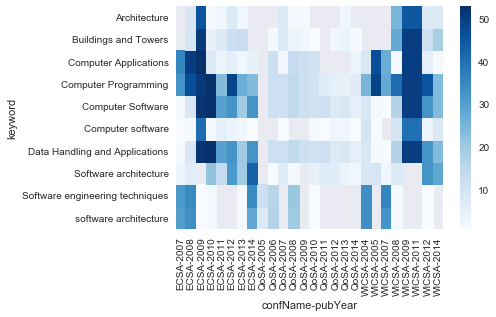

In [9]:
h = seeKWTop20(top = 10)


/Users/aileennovero1/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


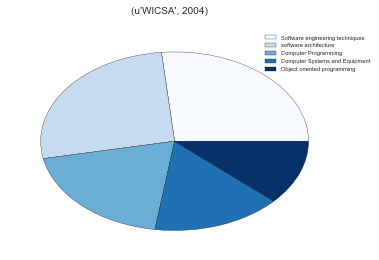

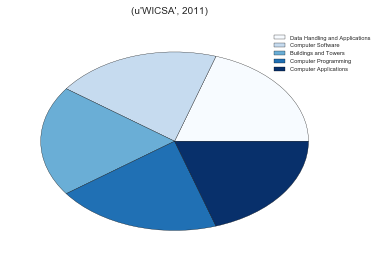

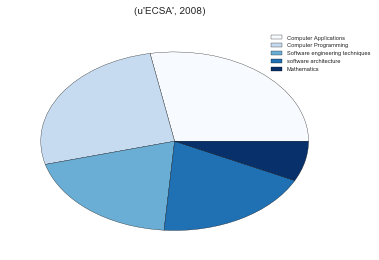

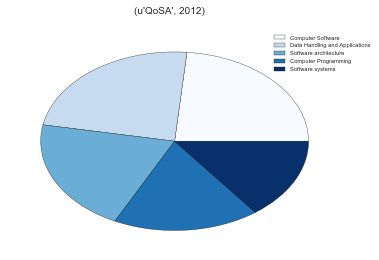

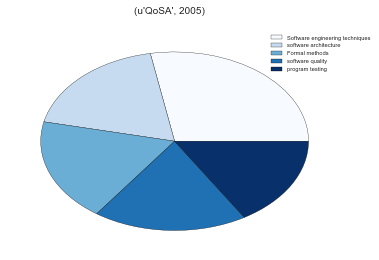

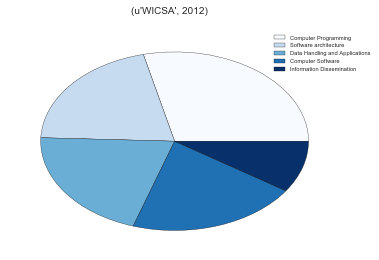

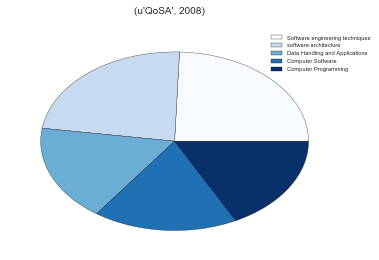

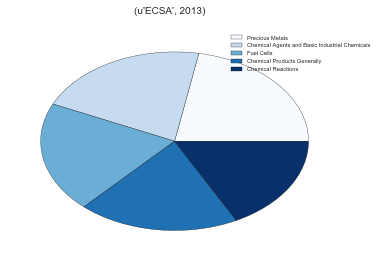

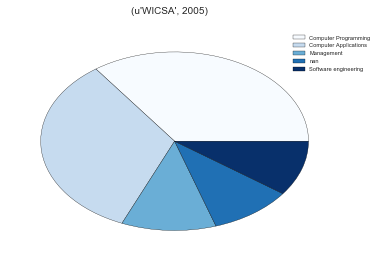

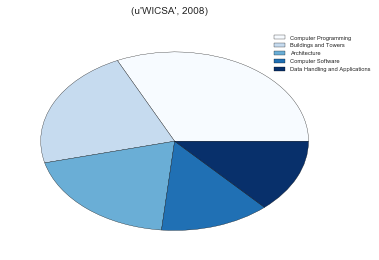

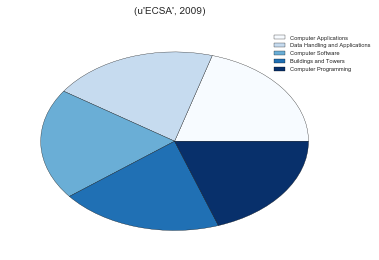

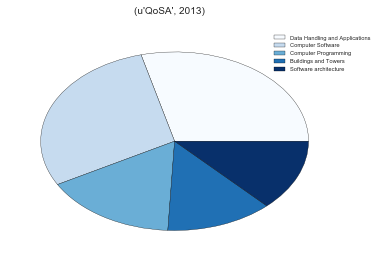

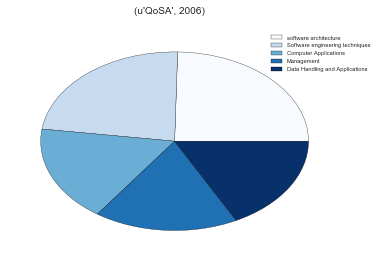

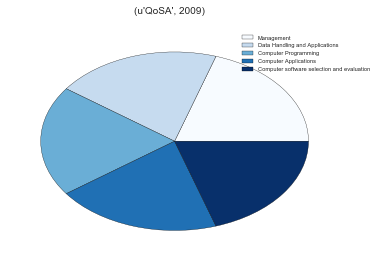

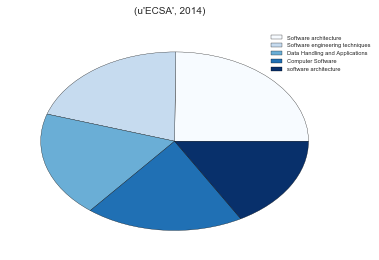

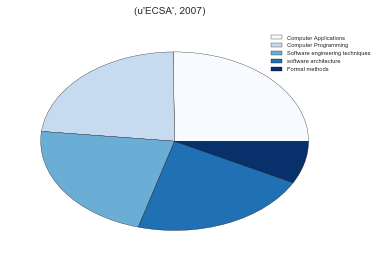

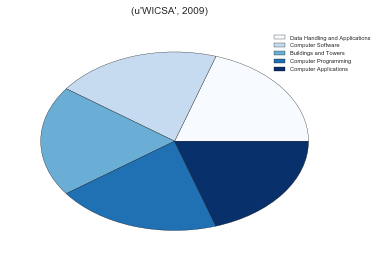

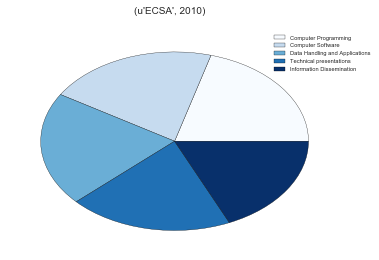

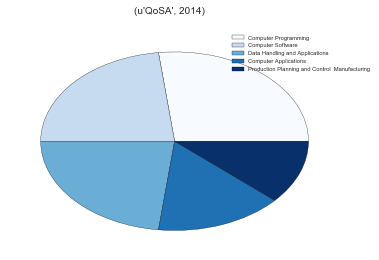

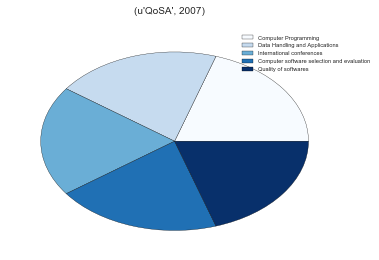

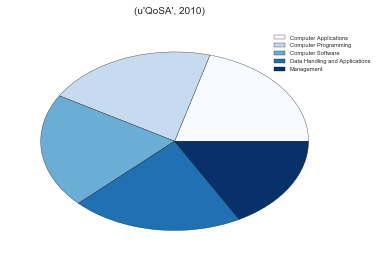

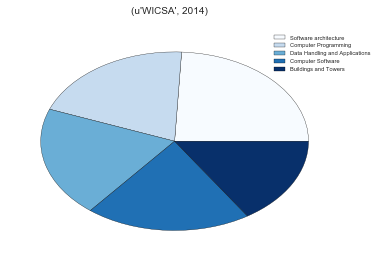

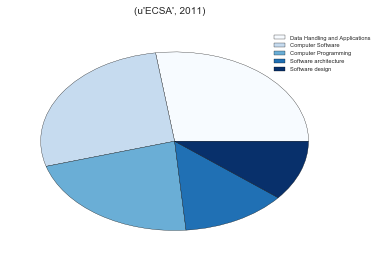

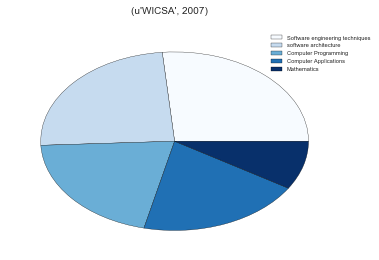

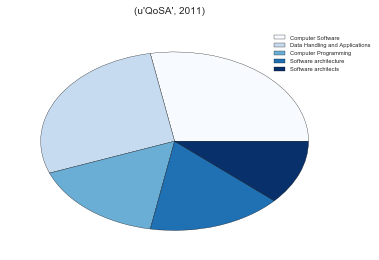

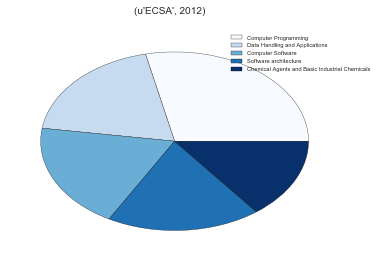

In [10]:
tryit = confYrKeywords(top = 5)

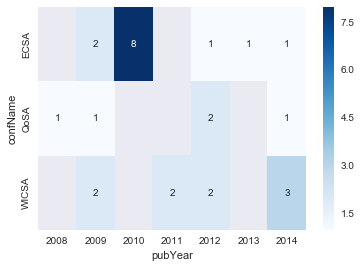

In [11]:
t = getKWTRends('Research', 'keyword')

/Users/aileennovero1/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


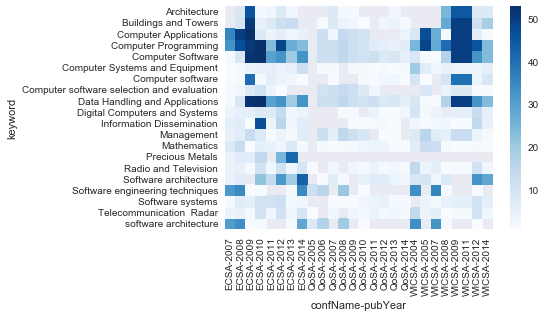

In [12]:
f = seeKWTop20()
#keys = np.array(f['data']['Top20'].keyword)
#keys.sort()
#keys

# Merging Papers and Authors!  YAYAYAYAYA!!!!

In [13]:
def getPaperAuthorMerge():
    
    with sqlite3.connect(mydb) as con:
        sqlcmd = "SELECT * FROM PAPERAUTHOR"
        
        papaudf = pd.read_sql_query(sqlcmd, con)
        
        sqlcmd2 = "SELECT paperID,title,confName, pubYear FROM PAPER"
        
        pap  = pd.read_sql_query(sqlcmd2, con)
        
        merged = papaudf.merge(pap, on =  'paperID')
        
        merged['counts'] = merged.groupby(['authorName'])['authorName'].transform('count')
        
        ap = merged.sort_values(by = ['counts','authorName'], ascending = False)
        
        entries = []
        for row in ap.as_matrix():
            entry = {key: value for (key, value) in zip(ap.columns, row)}
            entries.append(entry)
        return dict(data = entries)  , ap 

def confYrAuthor():
    grouper = ['confName', 'pubYear']
    m, f = getPaperAuthorMerge()
    grouper = ['confName', 'pubYear']
    testgroup = f.groupby(grouper)
    
    myentries = []
    for group in testgroup.groups.keys():
        authorcts = testgroup.get_group((group)).groupby(["authorName"])["authorName"].count()
        
        resetAU = pd.DataFrame(authorcts).rename(columns = {'authorName' : 'IndivCt'})
        resetAU.reset_index(inplace = True)
        
        mer = pd.merge(resetAU, testgroup.get_group((group)))
            
        entry = {}
        entry['Group'] = group
        entry['AuthorsPapers'] = mer
        
        
        myentries.append(entry)
    
    return dict(data = myentries)
            
def getauthorsbyID(paperID):
    m, df2 = getPaperAuthorMerge()
    dframe = df2
    query = 'paperID == %d' %paperID
    return dframe.query(query)

def getauthorsbyName(author):
    m, df2 = getPaperAuthorMerge()
    dframe = df2[df2['authorName'].str.contains(author)==True]
    #query = 'authorName == "%s"' %author
    return dframe


In [14]:
def getAuthorTop20(top = 20, column = 'authorName'):
    
    with sqlite3.connect(mydb) as con:
        
        sqlcmd = "SELECT * FROM PAPERAUTHOR"
        papaudf = pd.read_sql_query(sqlcmd, con)
        
        sqlcmd2 = "SELECT paperID, confName FROM PAPER"
        pap  = pd.read_sql_query(sqlcmd2, con)
        
        merged = papaudf.merge(pap, on =  'paperID')
        merged['counts'] = merged.groupby([column])[column].transform('count')
        
        ap = merged.sort_values(by = ['counts',column], ascending = False).drop_duplicates(column)[:20]
        
        temp = merged.groupby('confName')
        selection = np.array(ap.authorName)
        
        return temp, selection
    
def getGrCts(data_frame, selection, column):
    
    grouped = {}
    for group in data_frame.groups.keys():
        temp = data_frame.get_group(group)
        counted = {}
        for au in selection:
            count = len(temp[temp[column].str.contains(au)==True])
            if count > 0 :
                counted[au] = count
            grouped[group] = counted
    return pd.DataFrame.from_dict(grouped)

In [15]:
def getGrCts(data_frame, selection, column):
    
    grouped = {}
    for group in data_frame.groups.keys():
        temp = data_frame.get_group(group)
        counted = {}
        for au in selection:
            count = len(temp[temp[column].str.contains(au)==True])
            if count > 0 :
                counted[au] = count
            grouped[group] = counted
    return pd.DataFrame.from_dict(grouped)


In [16]:
grouped = {}
for group in t.groups.keys():
    temp = t.get_group(group)
    counted = {}
    for c in au:
        count = len(temp[temp['authorName'].str.contains(c)==True])
        if count > 0 :
            counted[c] = count
        grouped[group] = counted
        


AttributeError: 'dict' object has no attribute 'groups'

In [17]:
pdAU = pd.DataFrame.from_dict(grouped)
pdAU

""


In [18]:
ap, s = getAuthorTop20()
new = getGrCts(ap, s, column = 'authorName')
newimage = createSpot(new, xlabel = 'Author', filename = '../Flask/app/static/Images/testAuGroup.png')


NameError: name 'createSpot' is not defined

In [ ]:
s

In [19]:
def createSpot(data_frame, xlabel = 'Country', ylabel = 'Counts', filename = '../Flask/app/static/Images/testCtsGroup.jpeg'):
    #set the labels
    plt.cla()
    plt.xticks( np.arange(len(data_frame)), data_frame.index, rotation = 90)
    plt.xlim(0,len(data_frame))
    plt.ylim(0, max(data_frame.max(axis = 1)) + 5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.grid(False)
    
    colors = sns.color_palette('GnBu_d')
    #plot!
    for i,column in enumerate(data_frame.columns):
        image = plt.scatter(x = data_frame.reset_index().index, 
                            y = data_frame[column], 
                            s = data_frame[column]*10, 
                            c = colors[i])
    
    
    #format the legend
    plt.legend(list (map(str,data_frame.columns)), 
               loc = 'upper left')
               
    plt.tight_layout()
    
    plt.savefig(filename)
    
        
    return image

In [ ]:

#y = createSpot(pdAU, xlabel = 'Author', filename = '../Flask/app/static/Images/testAuGroup.png') 

In [ ]:
plt.scatter(x = topau[:100].index, y = topau[:100].counts, s = topau[:100].counts*20)

In [ ]:
authByName = getauthorsbyName("Schmerl")
authByName

In [20]:
def confYrAuthor():
    grouper = ['confName', 'pubYear']
    m, f = getPaperAuthorMerge()
    grouper = ['confName', 'pubYear']
    testgroup = f.groupby(grouper)
    
    myentries = []
    for group in testgroup.groups.keys():
        authorcts = testgroup.get_group((group)).groupby(["authorName"])["authorName"].count()
        
        resetAU = pd.DataFrame(authorcts).rename(columns = {'authorName' : 'IndivCt'})
        resetAU.reset_index(inplace = True)
        
        mer = pd.merge(resetAU, testgroup.get_group((group)))
            
        entry = {}
        entry['Group'] = group
        entry['mer'] = mer
        
        
        myentries.append(entry)
    
    return myentries
        
#@App.route('/confyrAuthor_bd/<conf>/<year>', methods=('GET',))
def confYrAuthor2(conf, year):
    grouper = ['confName', 'pubYear']
    d,f = getPaperAuthorMerge()
    grouper = ['confName', 'pubYear']
    group = f.groupby(grouper)
    
    try:
        print (conf, year)
        subgroup =  group.get_group((conf, year))
                                  
        print ('subgroupmade')
        cts = subgroup.groupby(["authorName"])["authorName"].count()
        
            
        resetAU = pd.DataFrame(cts).rename(columns = {'authorName' : 'IndivCt'})
        resetAU.reset_index(inplace = True)
        
        merged = pd.merge(resetAU, subgroup)

        mytable = []
        for idx in merged.index.get_values():
            entry = {}
            entry['Author'] = merged.loc[idx]['authorName']
            entry['paperID'] = merged.loc[idx]['paperID']
            entry['Title'] = merged.loc[idx]['title']
            entry['AuthorYrCount'] = merged.loc[idx]['IndivCt']    
            
            mytable.append(entry)
        
        return dict(data = mytable)
    
    except:
        print('Conference Year error')
        mytable = {entry['Author'] : 'No Conference Data',
                   entry['paperID'] : 'No Conference Data',
                   entry['Title'] : 'No Conference Data',
                   entry['AuthorYrCount'] : 'No Conference Data'
                   }
        return dict(data = mytable)
 


In [ ]:
d = confYrAuthor2('WICSA', 2004)

In [ ]:
rr = confYrAuthor()

In [ ]:
print rr[0]['Group']

gg = rr[0]['mer']

In [ ]:
gg.head(20)

In [ ]:
ids = np.array(df2.paperID)
yrs = np.array(df2.pubYear)
cts = np.array(df2.counts)*10

In [ ]:
plt.scatter(yrs, ids, s = cts)
plt.text(2012, 140, 'Zdun Uwe')
plt.text(2012, 13, 'Van Vliet')

In [ ]:
labels = {'WICSA' :1 ,
         'ECSA' : 2,
         'QoSA' : 3}
    
    

In [21]:
def testspot(kw, grouper):
    
    m, f = getPapersKWgroup(grouper)
    
    query2 = '"%s" == keyword' %kw
    
    data_frame = m.copy()
    data_frame.query(query2, inplace = True)
    new = data_frame.copy()
    
    KWgrouper = ["pubYear", "confName"]

    df = getSpot(new, KWgrouper)
    return df
    
    

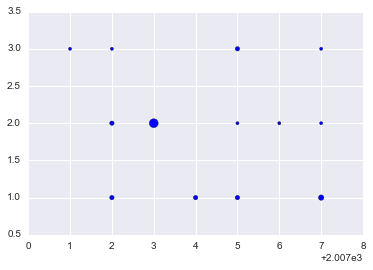

In [22]:
d = testspot('Research', 'keyword')

In [ ]:
#from difflib import SequenceMatcher

In [ ]:
#m = SequenceMatcher(None, "NEW YORK METS", "NEW YORK MEATS")

In [ ]:
#m.ratio()

In [ ]:
test

In [23]:
import pycountry

In [24]:

def getAffiliation():
    
    with sqlite3.connect('Abstracts_DB.db') as con:
        sqlcmd = "SELECT paperID, affiliation, confName, pubYear FROM PAPER "
        
        paperdf = pd.read_sql_query(sqlcmd, con)
        
        #sqlcmd2 = "SELECT paperID, keyword FROM PAPERKEY "
        #kwdf = pd.read_sql_query(sqlcmd2, con)
        #kwdf['keyword'] = kwdf['keyword'].apply(lambda word: eval(word))
        
        #merged = kwdf.merge(paperdf, on = 'paperID')
        
        #subgrp = merged.groupby(grouper)
        
        return paperdf

def searchAffiliation(country):
    #countries = [c.name for c in pycountry.countires]
    with sqlite3.connect('Abstracts_DB.db') as con:
        sqlcmd = "SELECT paperID, affiliation, confName, pubYear FROM PAPER "
        
        paperdf = pd.read_sql_query(sqlcmd, con)
        
        datadf = paperdf[paperdf['affiliation'].str.contains(country or country.lower())==True]
        
        mytable = []
        for idx in datadf.index.get_values():
            entry = {}
            entry['paperID'] = datadf.loc[idx]['paperID']
            entry['affiliation'] = datadf.loc[idx]['affiliation']
            html2 = "http://127.0.0.1:5000/PaperID/"+ str(datadf.loc[idx]['paperID'])
            entry['getPaper'] =  "<a href='%s'<button>getPaper</button>></a>" %html2  
            
            mytable.append(entry)
        
        return dict(data = mytable)
        

In [25]:

def dict_factory(cursor, row):
    d = {}
    for idx, col in enumerate(cursor.description):
        d[col[0]] = row[idx]
    return d


'''
                                                TOTAL TABLES
''' 
def getPaper(id):
    '''Return Jsonified table SELECT *'''
    
    with sqlite3.connect(mydb) as con:
        sqlcmd = "SELECT paperID, title, confName, pubYear, abstract FROM PAPER WHERE paperID == %d" %id
        con.row_factory = dict_factory
        cur = con.cursor()
        cur.execute(sqlcmd)
        entries = cur.fetchall()
        #data = {'data' : entries}
        #df = pd.read_sql_query(sqlcmd, con)
    return dict(data=entries)



In [26]:
def getPaper(id):
    #countries = [c.name for c in pycountry.countires]
    with sqlite3.connect('Abstracts_DB.db') as con:
        sqlcmd = "SELECT paperID, title, confName, pubYear, abstract FROM PAPER WHERE paperID == %d" %id
        paperdf = pd.read_sql_query(sqlcmd, con)
        
        return paperdf

In [27]:
aff2 = searchAffiliation('United')

In [53]:
aff2

{'data': [{'affiliation': u'Sch  of Comput  Sci , Carnegie Mellon Univ , Pittsburgh, PA, United States',
   'getPaper': "<a href='http://127.0.0.1:5000/PaperID/10'<button>getPaper</button>></a>",
   'paperID': 10},
  {'affiliation': u'Department of Computer Science, University of Leicester, University Road, Leicester LE1 7RH, United Kingdom  2  Computing Department, Open University, Walton Hall, Milton Keynes MK7 6AA, United Kingdom',
   'getPaper': "<a href='http://127.0.0.1:5000/PaperID/11'<button>getPaper</button>></a>",
   'paperID': 11},
  {'affiliation': u'Dept  of Comput  Sci , Univ  of Leicester, Leicester, United Kingdom',
   'getPaper': "<a href='http://127.0.0.1:5000/PaperID/12'<button>getPaper</button>></a>",
   'paperID': 12},
  {'affiliation': u'Department of Chemical and Biomolecular Engineering, University of Houston, Houston, TX 77204, United States  2  Institut fuer Chemie, Technische Universitaet Berlin, 10623 Berlin, Germany',
   'getPaper': "<a href='http://127.0.0

In [28]:
paper = getPaper(13)

In [29]:
paper

,paperID,title,confName,pubYear,abstract
0,13,Ontology based software architecture documenta...,ECSA,2012,A common approach to software architecture doc...


In [30]:

def getBasicAffiliationCount():
    '''
    : param NONE:
    : output : Dictionary of the found countries and their counts, barchart too
    '''
    from pycountry import countries 
    with sqlite3.connect('Abstracts_DB.db') as con:
        sqlcmd = "SELECT affiliation FROM PAPER "
        
        affildf = pd.read_sql_query(sqlcmd, con)
        countries = [country.name for country in countries]
        
        counts = {}
        for c in countries:
            count = len(affildf[affildf['affiliation'].str.contains(c or c.lower())==True])
            if count > 0:
                counts[c] = count
        #countsDF = pd.DataFrame.from_dict(counts, orient='index').reset_index().rename(columns = {"index":'Country', 0:'Counts'})
        #return countsDF, counts
        plt.figure()
        plt.xticks(rotation=90)
        plt.yticks(rotation=90)
   
        image = sns.barplot(x = counts.keys(), 
                            y = counts.values(),
                            palette='Blues')
        for p in image.patches:
            image.annotate(
                s='{:.0f}'.format(p.get_height()), #label
                xy=(p.get_x()+p.get_width()/2.,p.get_height()), #position
                ha='center',va='center',
                xytext=(0,10),
                textcoords='offset points'
            )
        image.set_ylabel('Count')
        image.set_xlabel("Country")
        #image.set_xticklabels(counts.keys(), rotation=30)
        plt.tight_layout()
        plt.savefig(('../Flask/app/static/Images/testaffil.jpeg'))
    
        
        return counts, image

In [ ]:
#counts = {}
#for c in countries:
    #count = len(affil[affil['affiliation'].str.contains(c or c.lower())==True])
    #if count > 0:
        #counts[c] = count
    

/Users/aileennovero1/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


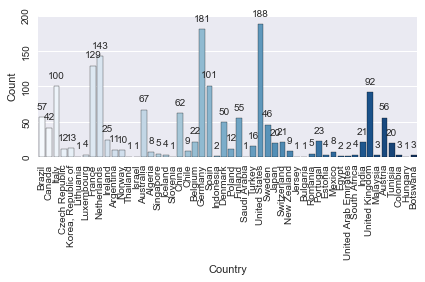

In [31]:
counts, image = getBasicAffiliationCount()


In [ ]:
datadic=[]
for i, (k, v) in enumerate(counts.iteritems()):
    datadic.append({'country' : k,
                 'count' : v})
dict(data = datadic)    

In [ ]:
dict(data = datadic)

In [32]:
def getBar(df, conference, xaxis, yaxis, orientation, ylabel = 'count', xlabel = 'trada'):
    plt.cla()
    fig = sns.barplot(data = df, 
                      y =  yaxis,#'keyword', 
                      x = xaxis, #'count', 
                      palette='Blues', 
                      orient = orientation)
    fig.set_ylabel(ylabel)
    fig.set_xlabel(xlabel)
    
    wc.to_file('../Flas/app/static/Images/testaffil.jpeg')
    return fig
    #plt.close()
    #return script.format(data)

In [33]:
def getSpot(d, KWgrouper, xaxis = 'pubYear', yaxis = 'coded', sizes = 'counts'):
    
    labels = {'WICSA':1, "ECSA":2, 'QoSA':3}
    df = d.groupby(KWgrouper)['keyword'].count().reset_index(name="counts")
    
    df['coded'] = df.confName.apply(lambda x: labels[x])
    
    fig = plt.scatter(x=df[xaxis], y =df[yaxis], s = df[sizes]*10)
    io = StringIO()
    plt.savefig(io, format='png')
    img = base64.encodestring(io.getvalue())
   
    io = StringIO()
    plt.savefig(io, format='png')
    data = base64.encodestring(io.getvalue())
    script = '''<img src="data:image/png;base64,{}";/>'''
    return fig 


In [34]:
d = getAffiliation()
d.head()
d.head(1).to_html(classes='affiliations')


def show_tables():
    data =  getAffiliation()
    data.set_index(['Name'], inplace=True)
    data.index.name=None
    ECSA = data.loc[data.confName=='ECSA']
    WICSA = data.loc[data.confName=='WICSA']
    QoSA = data.loc[data.confName == 'QoSA']
    return render_template('view.html',tables=[ECSA.to_html(classes='ECSA'),
                                               WICSA.to_html(classes='WICSA'), 
                                               QoSA.to_html(classes='QoSA')],
    titles = ['na', 'ECSA', 'WICSA', 'QoSA'])


In [ ]:
gr = d.groupby(['confName'])

In [35]:
from pycountry import countries 

In [ ]:
for group in gr.groups:
    
    countries = [country.name for country in countries]
        
        counts = {}
        for c in countries:
            count = len(affildf[affildf['affiliation'].str.contains(c or c.lower())==True])
            if count > 0:
                counts[c] = count
    print group
    

In [36]:
def countryGr():
    from pycountry import countries 
    with sqlite3.connect('Abstracts_DB.db') as con:
        sqlcmd = "SELECT affiliation, confName FROM PAPER"
        
        affildf = pd.read_sql_query(sqlcmd, con)
        
        gr = affildf.groupby('confName')
        countries = [country.name for country in countries]
        grouped = {}
        for group in gr.groups.keys():
            temp = gr.get_group(group)
            counted = {}
            for c in countries:
                count = len(temp[temp['affiliation'].str.contains(c)==True])
                if count > 0 :
                    counted[c] = count
            grouped[group] = counted
        
        return pd.DataFrame.from_dict(grouped)

def createSpot(data_frame, xlabel = 'Country', ylabel = 'Counts', filename = '../Flask/app/static/Images/testCtsGroup.jpeg'):
    #set the labels
    plt.xticks( np.arange(len(data_frame)), data_frame.index, rotation = 90)
    plt.xlim(0,len(data_frame))
    plt.ylim(0, max(data_frame.max(axis = 1)) + 5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.grid(False)
    
    colors = sns.color_palette('GnBu_d')
    #plot!
    for i,column in enumerate(data_frame.columns):
        image = plt.scatter(x = data_frame.reset_index().index, 
                            y = data_frame[column], 
                            s = data_frame[column], 
                            c = colors[i])
    
    
    #format the legend
    plt.legend(list (map(str,data_frame.columns)), 
               loc = 'upper left')
               
    plt.tight_layout()
    
    plt.savefig(filename)
    
        
    return image

In [72]:
df = countryGr()

/Users/aileennovero1/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [73]:
df.head()

,ECSA,QoSA,WICSA
Algeria,6.0,NaN,2.0
Argentina,3.0,2.0,6.0
Australia,20.0,22.0,25.0
Austria,31.0,2.0,23.0
Belgium,11.0,3.0,8.0


In [39]:
x = createSpot(dataDF)
x

NameError: name 'dataDF' is not defined

In [ ]:
sns.distplot(dataDF, kde=False, color = ['red', 'blue', 'green'] );

In [81]:
def getarea(d):
    fig = plt.figure()
    fig = d.plot(kind = 'area',  colormap = 'Blues', stacked = False)
    for c in d.columns:
        sns.swarmplot(data = d, x=d.index, 
                        y = d[c],
                        palette = 'Blues')
    fig.patch.set_facecolor('lightgray')
    plt.xticks( np.arange(len(d)), d.index, rotation = 90)
    plt.xlim(0,len(d))
    plt.ylim(0, max(df.max(axis = 1)) + 5)
    plt.xlabel('country')
    plt.ylabel('counts')
    plt.grid(False)
    
    plt.tight_layout()
    
    plt.savefig('check.png')
    #plt.close()
    #return script.format(data)



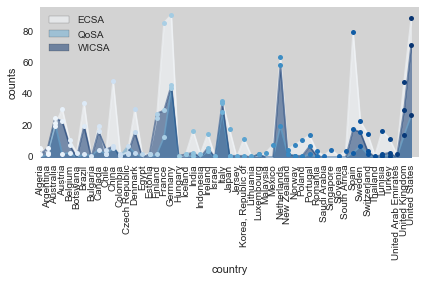

In [82]:
getarea(df)

In [78]:
df.index.get_values()

array([u'Algeria', u'Argentina', u'Australia', u'Austria', u'Belgium',
       u'Botswana', u'Brazil', u'Bulgaria', u'Canada', u'Chile', u'China',
       u'Colombia', u'Czech Republic', u'Denmark', u'Egypt', u'Estonia',
       u'Finland', u'France', u'Germany', u'Hungary', u'Iceland', u'India',
       u'Indonesia', u'Ireland', u'Israel', u'Italy', u'Japan', u'Jersey',
       u'Korea, Republic of', u'Lithuania', u'Luxembourg', u'Malaysia',
       u'Mexico', u'Netherlands', u'New Zealand', u'Norway', u'Poland',
       u'Portugal', u'Romania', u'Saudi Arabia', u'Singapore', u'Slovenia',
       u'South Africa', u'Spain', u'Sweden', u'Switzerland', u'Thailand',
       u'Tunisia', u'Turkey', u'United Arab Emirates', u'United Kingdom',
       u'United States'], dtype=object)

In [83]:
def seeKWCts():
    '''
    : param top int: number of top keywords to return, default 20
    : output : Returns a json dicitonary of the frequency of the top 
                keywords over all years and a heatmap
    '''
    m, f = getPapersKWgroup('keyword')
    
    topWds = f.count().sort_values(by = 'confName', ascending = False)
    
    mTop = m[m['keyword'].isin(topWds.index)]
    
    mTop['counts'] = mTop.groupby(['confName', 'pubYear', 'keyword'])['keyword'].transform('count')

    return mTop

In [149]:
kwcts = seeKWCts()
kwcts.groupby('confName').head()

/Users/aileennovero1/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,paperID,keyword,title,confName,pubYear,counts
5,1,Software systems,On the need of safe software product line arch...,ECSA,2010,11
8,1,Computer Programming,On the need of safe software product line arch...,ECSA,2010,53
13,2,Computer software,Feature model to product architectures Applyi...,ECSA,2009,41
15,2,Data Handling and Applications,Feature model to product architectures Applyi...,ECSA,2009,52
17,2,Computer Systems and Equipment,Feature model to product architectures Applyi...,ECSA,2009,4
37,3,Computer software,Feature model to product architectures Applyi...,WICSA,2009,40
39,3,Data Handling and Applications,Feature model to product architectures Applyi...,WICSA,2009,50
41,3,Computer Systems and Equipment,Feature model to product architectures Applyi...,WICSA,2009,4
43,3,Computer Programming,Feature model to product architectures Applyi...,WICSA,2009,50
46,3,Computer Software,Feature model to product architectures Applyi...,WICSA,2009,50


In [145]:
def getSpotkw(d, yaxis = 'coded', sizes = 'counts'):

    labels = {'WICSA':1, "ECSA":2, 'QoSA':3}
    d = d.groupby('confName')
    d['coded'] = d.keyword.apply(lambda x: labels[x])
    
    fig = plt.scatter(x=d['coded'], y =d['counts'], s = d[sizes]*10)

    
    return fig 

In [154]:
kwcts = seeKWCts()
labels = {v: k for k, v in kwcts.keyword.to_dict().items()}
d = kwcts
d['code'] = d.keyword.apply(lambda x: labels[x])

/Users/aileennovero1/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


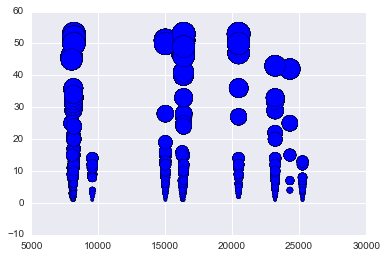

In [159]:
d.head(25)
plt.scatter(x=d['code'], y =d['counts'], s = d['counts']*10)